In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
#import logging

In [2]:
#logging.basicConfig(filename='run.log', level=logging.DEBUG)
#logging.basicConfig(format='%(asctime)s %(message)s')
#logging.info('Starting')

In [3]:
df = pd.read_csv("../data/7282_1.csv")   

In [4]:
df.dtypes

address                  object
categories               object
city                     object
country                  object
latitude                float64
longitude               float64
name                     object
postalCode               object
province                 object
reviews.date             object
reviews.dateAdded        object
reviews.doRecommend     float64
reviews.id              float64
reviews.rating          float64
reviews.text             object
reviews.title            object
reviews.userCity         object
reviews.username         object
reviews.userProvince     object
dtype: object

In [5]:
df.describe()

,latitude,longitude,reviews.doRecommend,reviews.id,reviews.rating
count,35826.000000,35826.000000,0.0,0.0,35050.000000
mean,37.285008,-85.725758,NaN,NaN,3.776431
std,6.996544,33.062263,NaN,NaN,1.416195
min,-25.436750,-166.559040,NaN,NaN,0.000000
25%,33.827340,-104.868200,NaN,NaN,3.000000
50%,37.936026,-86.822972,NaN,NaN,4.000000
75%,41.672491,-77.044550,NaN,NaN,5.000000
max,63.877674,115.164407,NaN,NaN,10.000000


In [6]:
df['reviews.rating'].plot(kind='hist', bins=10)

In [7]:
Review_freq = df['name'].value_counts()

In [8]:
Review_freq[Review_freq >= 5]

The Alexandrian, Autograph Collection                       1185
Howard Johnson Inn - Newburgh                                714
Americas Best Value Inn                                      567
Fiesta Inn and Suites                                        546
Ip Casino Resort Spa                                         392
Best Western Plus Waterville Grand Hotel                     335
Hampton Inn Virginia Beach Oceanfront North                  334
Comfort Suites                                               326
New York Marriott Marquis                                    320
Best Western of Long Beach                                   317
Plaza Hotel and Casino - Las Vegas                           289
Doubletree By Hilton West Palm Beach Airport                 276
Anaheim Marriott Suites                                      275
Jacksonville Plaza Hotel and Suites                          264
Red Roof Inn Erie                                            243
Hotel Deca - A Noble Hous

In [9]:
df = df[df['name'].isin(Review_freq[Review_freq >= 10].index)]

In [10]:
#df['reviews.rating'].fillna(2.5)

In [11]:
df = df[df['reviews.rating'] <= 5]

In [12]:
df = df[df['reviews.text'].isna() == False]
#df['reviews.text'].isna() == True


In [13]:
df = df.head(100)

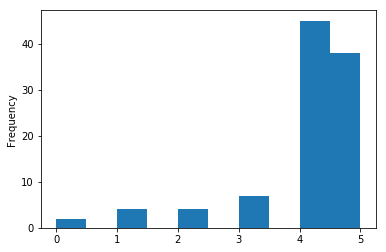

In [14]:
df['reviews.rating'].plot(kind='hist', bins=10)

In [15]:
#df = df.head(25) # Sample of data to developement

In [16]:
def SentimenAnalysis(text):
# Function that receive the text and return:
# sentimento polarity
# sentimento subjectivity
# Key Verbs 
    #print(">" + text)
    
    
    
    #variables initialization
    fix = 0
    clear = 0 
    enhance = 0
    change =0
    improve = 0
    remove = 0
    recommend = 0
    like = 0
    love = 0
    enjoy = 0
    
    sentiment_polarity = 0
    sentiment_subjectivity = 0
    
    text = text.replace('\"','').replace('.','')
    blob = TextBlob(text.lower())
    
    
    #Sentiment classification
    try:
        try:
            blob = blob.translate(to='en')
        except:
            pass #do nothing  
        
        sentiment_polarity = blob.sentiment[0]
        sentiment_subjectivity = blob.sentiment[1]        
    except:        
        sentiment_polarity = 999
        sentiment_subjectivity = 999
    
    
    #Key verbs analysis
    try:
        for word,pos in blob.tags:
            if pos in ('VB'):#,'VBZ','VBP','VBD','VBN','VBG'):
                lemma = word.lemmatize("v")
                if lemma == "fix": fix = 1 
                if lemma == "clear": clear = 1
                if lemma == "enhance": enhance = 1
                if lemma == "change:": change = 1
                if lemma == "improve": improve = 1
                if lemma == "remove":  remove = 1
                if lemma == "recommend": recommend = 1
                if lemma == "like": like = 1
                if lemma == "love": love = 1
                if lemma == "enjoy": enjoy = 1

    except:
        pass #do nothing  
        

    #Return the results    
    return sentiment_polarity,sentiment_subjectivity,fix,clear,enhance,change,improve,remove,recommend,like,love,enjoy 
    

In [17]:
df.shape[0]

100

In [18]:
#blob = TextBlob(df['reviews.title'][0])

y=[]
header = ['sentiment_polarity','sentiment_subjectivity','fix','clear','enhance','change','improve','remove','recommend','like','love','enjoy']
df2 = (df['reviews.title']+ " "+ df['reviews.text']).apply(lambda x: SentimenAnalysis(str(x)))

df2.shape[0]


100

In [19]:
df2

0      (0.5566666666666666, 0.6533333333333334, 0, 0,...
1         (0.68125, 0.725, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
2             (0.35, 0.55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
3      (0.36018518518518516, 0.6222222222222222, 0, 0...
4      (0.3177083333333333, 0.625, 0, 0, 0, 0, 0, 0, ...
5      (0.5691666666666667, 0.8405555555555555, 0, 0,...
6            (0.75, 0.875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
7            (0.75, 0.875, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
8               (0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
9               (0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
10              (0.0, 0.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
11     (0.26836734693877556, 0.5163265306122449, 0, 0...
12           (0.3125, 0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
13            (0.625, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
14              (0.0, 0.3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
15     (0.4590277777777778, 0.65, 0, 0, 0, 0, 0, 0, 0...
16     (0.595, 0.8099999999999999, 0, 0, 0, 0, 0, 0, ...
17              (0.0, 0.3, 0, 0

In [20]:
for i in df2:
    y.append(i)
    
df2 = pd.DataFrame(y,columns = header)

df3 = pd.concat([df,df2],axis=1)

In [21]:
df3 = df3[df3['sentiment_polarity'].isnull() == False]
df3 = df3[df3['reviews.rating'].isnull() == False]

In [22]:
from sklearn import preprocessing

def MinMaxScale(df,feature):
    try:
        scaler = preprocessing.MinMaxScaler()
        df[feature] = scaler.fit_transform(df[[feature]])#.apply(lambda x: round(x,3)))
    except:
        print('Fail in Normalization '+ feature)  
    return df

df3 = pd.DataFrame(MinMaxScale(df3,'sentiment_polarity'))

df3 = pd.DataFrame(MinMaxScale(df3,'reviews.rating'))




In [23]:
df3['sentiment_polarity'].count()

95

In [24]:
df3.to_csv('../data/HotelReview.csv', encoding='utf-8', sep='|',index=False)

In [25]:
df3

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,...,fix,clear,enhance,change,improve,remove,recommend,like,love,enjoy
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-05T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-06-10T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-05-14T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-09-14T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-05-16T00:00:00Z,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
